# Diabetes Regression Project

This is my first DIY regression project on the built-in sklearn 'Diabetes' dataset.

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import seaborn as sns

In [2]:
diab_df = datasets.load_diabetes(as_frame=True)

In [3]:
print(diab_df.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

## Data Exploration

### Features

In [4]:
features = diab_df['data']

The first thing I can see from using `head()` method on the dataset is that every dataset appears to already be normalised. I will confirm this by following it up with the `describe()` method to get summary statistics.

In [5]:
features.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [6]:
features.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


In [7]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


A nice way to visualise the distributions (and also to confirm they definitely are noramlised features) is to use pandas.DataFrame's builtin method of `.hist()` which will plot a grid of histograms for each variable in the dataframe.

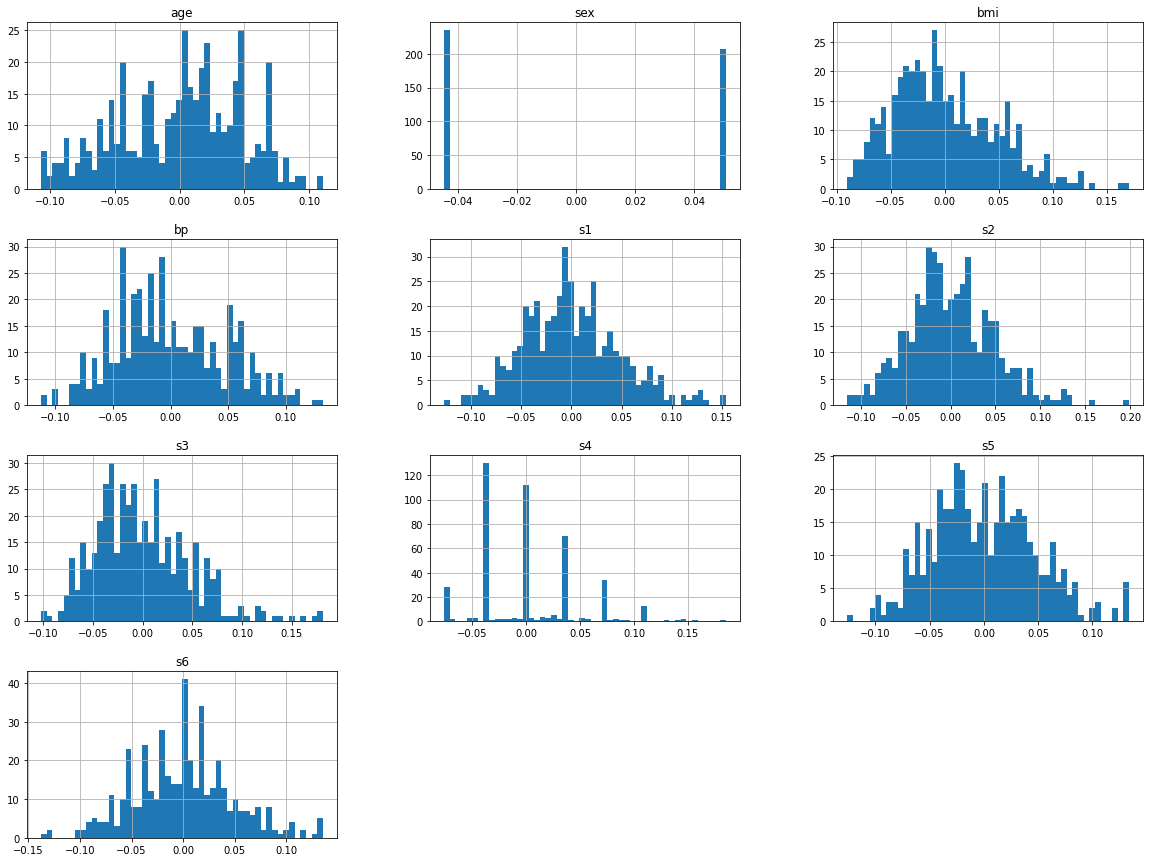

In [8]:
%matplotlib inline
features.hist(bins=50, figsize=(20,15))
plt.show()

#### Sex Feature

`sex` : It is binary, which makes sense, male or female. But what I find interesting is that because this has been normalised, the values are represented as [0.05068012, -0.04464164].

I am curious as to how these values are derived?

I've posted a datascience.stackexchange question to see why: https://datascience.stackexchange.com/questions/101823/how-are-the-values-for-the-sex-feature-in-sklearn-diabetes-dataset-obtained

In [9]:
features.sex.value_counts()

-0.044642    235
 0.050680    207
Name: sex, dtype: int64

### Target Variable

Taken from the dataset description: 
> :Target: Column 11 is a quantitative measure of disease progression one year after baseline

So presumably, the higher the value, the higher the 'progression' or 'worsening' of the disease. At least that's how I make sense of it.

In [10]:
target = diab_df['target']

<AxesSubplot:>

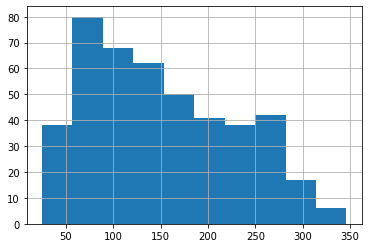

In [11]:
target.hist()

## Create Train-Test Datasets

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
?train_test_split

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets

Quick utility that wraps input validation and
``next(ShuffleSplit().split(X, y))`` and application to input data
into a single call for splitting (and optionally subsampling) data in a
oneliner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

train_

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    features,
    target,
    test_size = 0.2,
    random_state=40
)

## Train Set Exploration

In [15]:
diabetes_explore = X_train.copy()

### Correlation Matrix

A quick way to get a feel for variable importance is to do a correlation matrix.
I quickly add back in the target variable (from y_train) to my exploration dataframe, and then obtain the correlation matrix.

In [16]:
diabetes_explore = pd.merge(diabetes_explore, y_train, how='inner', left_index=True, right_index=True)

In [17]:
diabetes_explore

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
310,-0.005515,-0.044642,0.064930,0.035644,-0.001569,0.014970,-0.013948,0.000729,-0.018118,0.032059,109.0
65,-0.045472,0.050680,-0.024529,0.059744,0.005311,0.014970,-0.054446,0.071210,0.042345,0.015491,163.0
275,-0.005515,0.050680,-0.011595,0.011544,-0.022208,-0.015406,-0.021311,-0.002592,0.011008,0.069338,94.0
334,-0.060003,0.050680,-0.047163,-0.022885,-0.071743,-0.057681,-0.006584,-0.039493,-0.062913,-0.054925,72.0
15,-0.052738,0.050680,-0.018062,0.080401,0.089244,0.107662,-0.039719,0.108111,0.036056,-0.042499,171.0
...,...,...,...,...,...,...,...,...,...,...,...
306,0.009016,0.050680,-0.001895,0.021872,-0.038720,-0.024800,-0.006584,-0.039493,-0.039810,-0.013504,44.0
165,-0.041840,-0.044642,-0.066563,-0.046985,-0.037344,-0.043276,0.048640,-0.039493,-0.056158,-0.013504,59.0
7,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064,63.0
219,-0.089063,-0.044642,-0.041774,-0.019442,-0.066239,-0.074277,0.008142,-0.039493,0.001144,-0.030072,185.0


In [18]:
corr_matrix = diabetes_explore.corr()

In [19]:
target_correlation = pd.DataFrame(corr_matrix["target"].sort_values(ascending=False))

In [20]:
target_correlation

,target
target,1.000000
bmi,0.607739
s5,0.577364
bp,0.474657
s4,0.419579
s6,0.382309
age,0.237438
s1,0.178289
s2,0.132072
sex,0.041837


<BarContainer object of 11 artists>

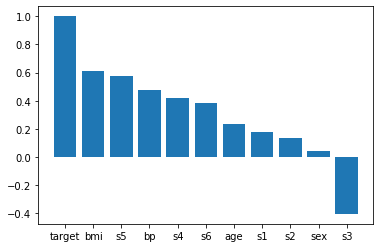

In [21]:
plt.bar(target_correlation.index, target_correlation['target'])

So interestingly the top 3 features in terms of correlation are:
1. BMI
2. S5 (Serum Triglycerides Level)
3. BP (Blood Pressure)

In [22]:
def create_scatter_matrix_for_top_n_corr_vars(df, top_n=5):
    """
    Takes in a dataframe and produces a scatter matrix for the top 'n' 
    highest correlated variables with the 'target'.
    
    Function assumes target is named 'target'.
    """
    
    corr_matrix = df.corr()
    
    # Extract the correlation matrix for the 'target'
    target_corr_df = pd.DataFrame(corr_matrix["target"].sort_values(ascending=False))
    
    # Apply absolute(), because we can have strong negative correlations and extract
    # top n features for plotting
    top_n_feature_names = target_correlation.abs().nlargest(top_n, 'target').index.values.tolist()
    
    scatter_matrix(df[top_n_feature_names], figsize=(20,12))

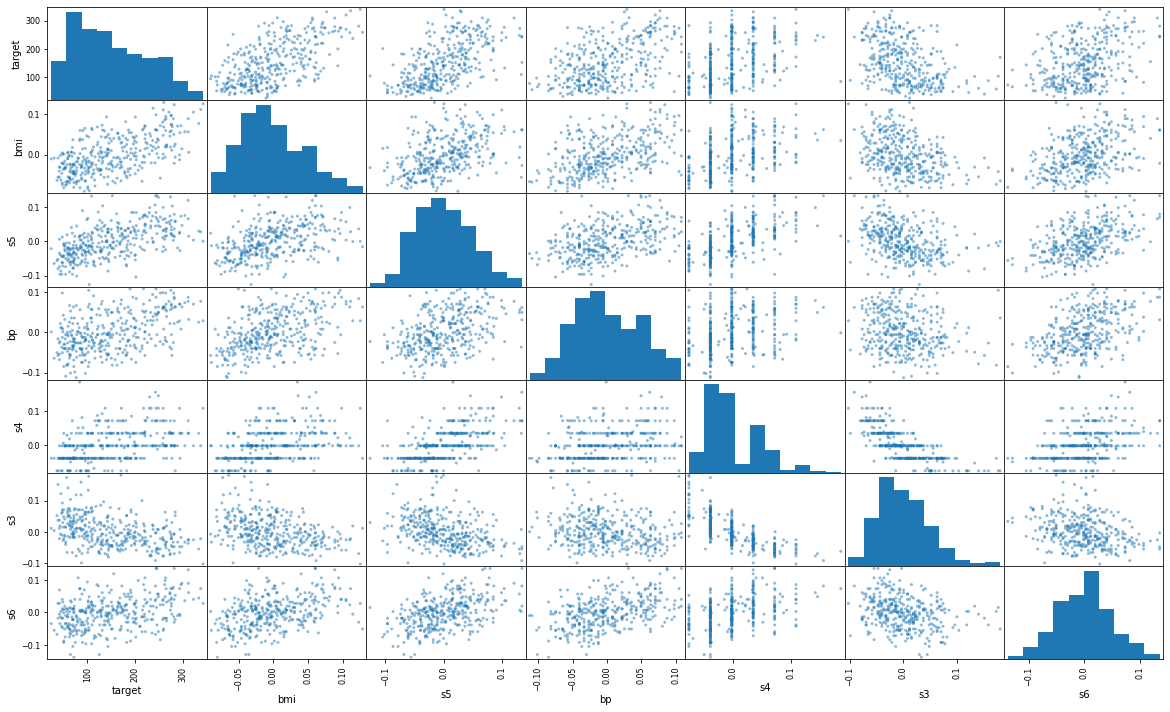

In [23]:
create_scatter_matrix_for_top_n_corr_vars(diabetes_explore, 7)

### Feature Engineering

### Data Cleaning

* Imputation: There are no null values in this dataset, so nothing to do here.
* Categorical Encoding: There are no categorical variables (the variables were already transformed when ingested)
* Feature Scaling: Already scaled when ingested

## Training & Evaluation

### Linear Regression Model

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [25]:
lin_reg.coef_

array([   24.30324094,  -234.27475469,   558.67936806,   303.40471546,
       -1014.82629141,   576.90198157,   167.90312909,   188.26767955,
         866.25383808,    18.32718138])

In [26]:
lin_reg.intercept_

150.81398413544443

In [27]:
lin_reg_predictions = lin_reg.predict(X_test)

### Lasso Regression Model

In [76]:
from sklearn.linear_model import Lasso

clf = Lasso(alpha=0.1)
clf.fit(X_train, y_train)

Lasso(alpha=0.1)

In [77]:
clf.coef_

array([   0.        , -144.09187298,  555.41435692,  262.43381089,
       -151.24009065,   -0.        , -188.11285918,    0.        ,
        552.11075503,    0.        ])

In [85]:
clf.intercept_

150.89515081736982

In [78]:
clf_predictions = clf.predict(X_test)

### Decision Tree Regression Model

In [28]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
tree_reg_predictions = tree_reg.predict(X_test)

### RandomForest Regression Model

In [29]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)
forest_reg_predictions = forest_reg.predict(X_test)

### Actuals Versus Predictions Data

In [79]:
actuals_vs_preds_df = pd.DataFrame(
    {
        'Actual': y_test,
        'Lin Reg Predictions': lin_reg_predictions,
        'Lasso Reg Predictions': clf_predictions,
        'Decision Tree Predictions': tree_reg_predictions,
        'Random Forest Predictions': forest_reg_predictions,
    }
)

In [80]:
actuals_vs_preds_df

,Actual,Lin Reg Predictions,Lasso Reg Predictions,Decision Tree Predictions,Random Forest Predictions
192,91.0,89.943002,102.936790,54.0,86.77
337,91.0,173.602251,167.081739,107.0,153.10
56,52.0,213.383259,203.488171,132.0,183.77
9,310.0,217.895863,214.308441,132.0,173.97
232,259.0,153.971292,155.489136,138.0,172.25
...,...,...,...,...,...
256,346.0,276.823768,263.062620,279.0,234.52
304,253.0,110.617878,119.476604,111.0,109.13
358,90.0,47.131762,55.462666,63.0,84.95
198,142.0,143.720341,150.566513,187.0,163.19


### Evaluation Metrics

In [32]:
from sklearn import metrics

In [33]:
def calculate_evaluation_metrics_for_model(test_df, model_preds, model_name: str):
    
    print(f"Calculating metrics for {model_name}")
    
    mae = metrics.mean_absolute_error(test_df, model_preds)
    mse = metrics.mean_squared_error(test_df, model_preds)
    rmse = np.sqrt(mse)
    
    return(mae, mse, rmse)

In [34]:
results = calculate_evaluation_metrics_for_model(y_test, lin_reg_predictions, 'Linear Regression')

Calculating metrics for Linear Regression


In [35]:
results2 = calculate_evaluation_metrics_for_model(y_test, tree_reg_predictions, 'Decision Tree Regression')

Calculating metrics for Decision Tree Regression


In [36]:
results3 = calculate_evaluation_metrics_for_model(y_test, forest_reg_predictions, 'Forest Regression')

Calculating metrics for Forest Regression


In [81]:
results4 = calculate_evaluation_metrics_for_model(y_test, clf_predictions, 'Lasso Regression')

Calculating metrics for Lasso Regression


In [83]:
model_evaluation_df = pd.DataFrame(
    {
        results,
        results2,
        results3,
        results4,
    },
    columns=['MAE', 'MSE', 'RMSE'],
    index=['lin_reg', 'tree_reg', 'forest_reg', 'lasso_reg']
)

In [84]:
model_evaluation_df

,MAE,MSE,RMSE
lin_reg,67.528090,7182.764045,84.751189
tree_reg,53.260674,4594.703119,67.784239
forest_reg,52.251558,4189.681600,64.727750
lasso_reg,51.907681,4062.760541,63.739788


In [39]:
model_evaluation_df = model_evaluation_df.reset_index()

In [40]:
model_evaluation_df = model_evaluation_df.rename(columns={'index':'model_name'})

In [41]:
melt_me = model_evaluation_df.melt(id_vars=['model_name'])

<AxesSubplot:xlabel='model_name', ylabel='value'>

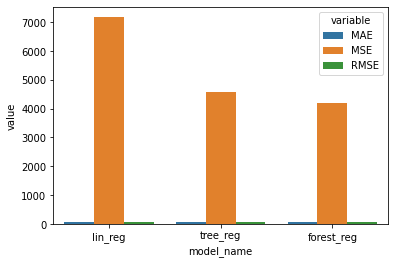

In [42]:
sns.barplot(x='model_name', y='value', hue='variable', data=melt_me)

## Model Tuning

So, my 3 models gave me an indication that linear regression and decision trees outperform random forest. This feels a little surprising.

But a big factor here is that I just plugged in the machine learning models with their default parameter values. 

I will now run Grid Search on each of the models to find the 'best' version of each of them, and then I will compare to see if anything changes significantly.

### Decision Tree Tuning

In [43]:
from sklearn.model_selection import GridSearchCV

In [61]:
param_grid = [
    {
        "max_depth": [1,2,3,4,5,7,10,15,20,25],
        "min_samples_split": [2,3,4,5],
        "min_samples_leaf": [1,2,3],
        "max_features": ['auto', 'sqrt', 'log2'],
        "max_leaf_nodes": [2,3,5,7,9,10,15,None]
    }
]

decision_tree = DecisionTreeRegressor()

tree_grid_search = GridSearchCV(decision_tree, param_grid, scoring='neg_mean_squared_error', return_train_score=True, refit=True)

In [62]:
tree_grid_search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 7, 10, 15, 20, 25],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'max_leaf_nodes': [2, 3, 5, 7, 9, 10, 15, None],
                          'min_samples_leaf': [1, 2, 3],
                          'min_samples_split': [2, 3, 4, 5]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [57]:
tree_grid_search.best_params_

{'max_depth': 3,
 'max_features': 'auto',
 'max_leaf_nodes': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [69]:
feature_importances = tree_grid_search.best_estimator_.feature_importances_
feature_names = X_train.columns
sorted(zip(feature_importances, feature_names))

[(0.0, 'age'),
 (0.0, 'bp'),
 (0.0, 's1'),
 (0.0, 's2'),
 (0.0, 's3'),
 (0.0, 's4'),
 (0.0, 's6'),
 (0.0, 'sex'),
 (0.374117675793657, 'bmi'),
 (0.6258823242063429, 's5')]

In [64]:
tree_gs_predictions = tree_grid_search.predict(X_test)

In [65]:
calculate_evaluation_metrics_for_model(y_test, tree_gs_predictions, 'Decision Tree (Post GS) Regression')

Calculating metrics for Decision Tree (Post GS) Regression


(55.173972397947935, 4804.036011178023, 69.3111535842394)

In [ ]:
gs_results = tree_grid_search.cv_results_
for mean_score, params in zip(gs_results['mean_test_score'], gs_results['params']):
    print(np.sqrt(-mean_score), params)

### Forest Tuning

In [71]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

random_forest_regressor = RandomForestRegressor()

forest_grid_search = GridSearchCV(random_forest_regressor, param_grid, scoring='neg_mean_squared_error', return_train_score=True, refit=True)

In [72]:
forest_grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [73]:
feature_importances = forest_grid_search.best_estimator_.feature_importances_
feature_names = X_train.columns
sorted(zip(feature_importances, feature_names))

[(0.013375850272218508, 'sex'),
 (0.049828080684481274, 'age'),
 (0.05049520440090227, 's1'),
 (0.05542766770739276, 's2'),
 (0.060140566125766425, 's4'),
 (0.06742465191446044, 's3'),
 (0.08009144654580894, 's6'),
 (0.11875606497878702, 'bp'),
 (0.22705396602647193, 's5'),
 (0.2774065013437104, 'bmi')]

In [74]:
forest_gs_predictions = forest_grid_search.predict(X_test)

In [75]:
calculate_evaluation_metrics_for_model(y_test, forest_gs_predictions, 'Forest (Post GS) Regression')

Calculating metrics for Forest (Post GS) Regression


(53.65131086142323, 4725.2777153558045, 68.74065547662317)